In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install -U tensorflow==2.0 --quiet

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [5]:
tf.__version__

'2.0.0'

Read the CSV file

In [0]:
path_files = '/content/drive/My Drive/Neural Networks/Project - 1/'

In [0]:
bank_df = pd.read_csv(path_files + 'Churn_Modelling.csv')

In [8]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
bank_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
bank_df.shape

(10000, 14)

Data Preparation and Cleaning

In [11]:
bank_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [0]:
cols_Check_NegativeValues = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [13]:
for colName in cols_Check_NegativeValues:
  print(colName)
  print(bank_df[bank_df[colName] < 0])
  print('---------------------------------------')

CreditScore
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []
---------------------------------------
Age
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []
---------------------------------------
Tenure
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []
---------------------------------------
Balance
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []
---------------------------------------
NumOfProducts
Empty DataFrame
Columns: [RowNumber, Cu

Observations:

1. There are no null values in the given data
2. Few features of the given dataset should be non-negative and there are no negative values in those features

5 - Point Summary Statistics

In [14]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [15]:
bank_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
len(bank_df['Surname'].unique().tolist())

2932

One Hot Encoding of Columns (Geography, Gender)

In [0]:
new_bank_df_1 = pd.get_dummies(data = bank_df, columns = ['Geography', 'Gender'], drop_first = True)

In [18]:
new_bank_df_1.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Correlation

In [0]:
corr_matrix = new_bank_df_1.corr()

In [20]:
corr_matrix

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571,-0.000044,-0.009905,0.018196
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248,-0.003097,0.007800,-0.002641
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112


In [0]:
#select the upper diagonal of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [22]:
upper

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,NaN,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571,-0.000044,-0.009905,0.018196
CustomerId,NaN,NaN,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248,-0.003097,0.007800,-0.002641
CreditScore,NaN,NaN,NaN,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,NaN,NaN,NaN,NaN,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,NaN,NaN,NaN,NaN,NaN,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,NaN,NaN,NaN,NaN,NaN,NaN,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012097,0.010297,-0.006482,-0.008112


Observations:
1. None of the features have strong correlation with others

Outlier Detection

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
cols_Check_Outliers = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

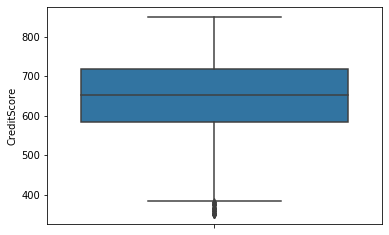

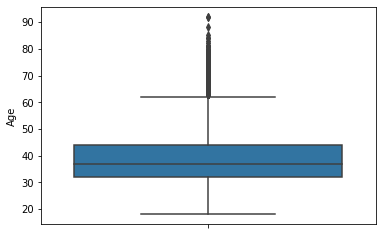

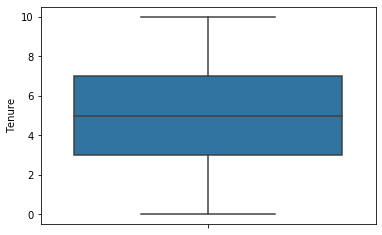

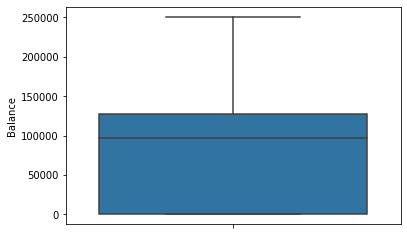

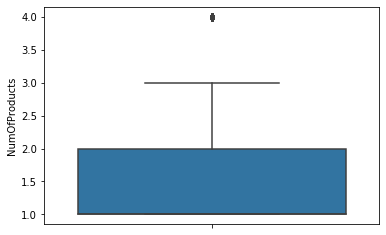

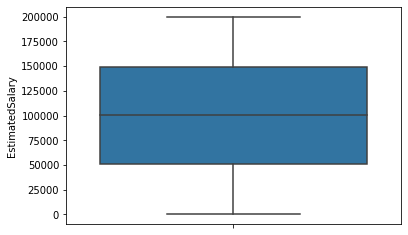

In [25]:
for colName in cols_Check_Outliers:
  sns.boxplot(y = bank_df[colName])
  plt.show()

Observations:
1. The features 'CreditScore', 'Age', 'NumOfProducts' has Outliers in their data

Detect Outliers in 'CreditScore', 'Age', 'NumOfProducts'

In [0]:
def returnOutlierLimits(colName):

    Q1 = bank_df[colName].quantile(0.25)
    Q3 = bank_df[colName].quantile(0.75)

    IQR = Q3 - Q1

    upper = Q3 + (1.5 * IQR)

    lower = Q1 - (1.5 * IQR)

    lower_limit_filter = bank_df[colName] < lower

    upper_limit_filter = bank_df[colName] > upper 

    return [lower_limit_filter, upper_limit_filter]

In [27]:
llf, ulf = returnOutlierLimits('CreditScore')

bank_df[llf | ulf]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,943,15804586,Lin,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,1194,15779947,Thomas,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,1839,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,2474,15679249,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,2580,15597896,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
8154,8155,15791533,Ch'ien,367,Spain,Male,42,6,93608.28,1,1,0,168816.73,1


In [28]:
# Replace the Credit Score with Median Credit Score

new_bank_df_1.loc[llf | ulf , 'CreditScore'] = new_bank_df_1['CreditScore'].median()
new_bank_df_1[llf | ulf]

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
7,8,15656148,Obinna,652.0,29,4,115046.74,4,1,0,119346.88,1,1,0,0
942,943,15804586,Lin,652.0,46,6,0.00,1,1,0,157333.69,1,0,0,0
1193,1194,15779947,Thomas,652.0,28,6,146098.43,3,1,0,100615.14,1,0,1,0
1405,1406,15612494,Panicucci,652.0,44,6,128747.69,1,1,0,146955.71,1,0,0,0
1631,1632,15685372,Azubuike,652.0,54,1,152677.48,1,1,1,191973.49,1,0,1,1
1838,1839,15758813,Campbell,652.0,39,0,109733.20,2,0,0,123602.11,1,1,0,1
1962,1963,15692416,Aikenhead,652.0,52,8,143542.36,3,1,0,141959.11,1,0,1,0
2473,2474,15679249,Chou,652.0,57,4,163146.46,1,1,0,169621.69,1,1,0,0
2579,2580,15597896,Ozoemena,652.0,30,0,127760.07,1,1,0,81537.85,1,1,0,1
8154,8155,15791533,Ch'ien,652.0,42,6,93608.28,1,1,0,168816.73,1,0,1,1


In [29]:
llf, ulf = returnOutlierLimits('Age')

bank_df[llf | ulf]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,59,15623944,T'ien,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,105,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,159,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,182,15789669,Hsia,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,9754,15705174,Chiedozie,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9765,9766,15777067,Thomas,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9832,9833,15814690,Chukwujekwu,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9894,9895,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0


In [30]:
# Replace the Age outliers with Median Age

new_bank_df_1.loc[llf | ulf, 'Age'] = new_bank_df_1['Age'].median()

new_bank_df_1.loc[llf | ulf]

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
58,59,15623944,T'ien,511.0,37.0,4,0.00,1,1,0,1643.11,1,0,1,0
85,86,15805254,Ndukaku,652.0,37.0,10,0.00,2,1,1,114675.75,0,0,1,0
104,105,15804919,Dunbabin,670.0,37.0,1,0.00,1,1,1,177655.68,1,0,1,0
158,159,15589975,Maclean,646.0,37.0,6,97259.25,1,0,1,104719.66,0,0,0,0
181,182,15789669,Hsia,510.0,37.0,2,0.00,2,1,1,48071.61,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,9754,15705174,Chiedozie,656.0,37.0,7,153545.11,1,1,1,186574.68,0,1,0,1
9765,9766,15777067,Thomas,445.0,37.0,2,136770.67,1,0,1,43678.06,0,0,0,1
9832,9833,15814690,Chukwujekwu,595.0,37.0,2,105736.32,1,1,1,89935.73,1,1,0,0
9894,9895,15704795,Vagin,521.0,37.0,6,0.00,2,1,1,49054.10,0,0,0,0


In [31]:
llf, ulf = returnOutlierLimits('NumOfProducts')

bank_df[llf | ulf]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
70,71,15703793,Konovalova,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
1254,1255,15610383,Dumetolisa,628,France,Female,46,1,46870.43,4,1,0,31272.14,1
1469,1470,15670374,Wright,819,Germany,Female,49,1,120656.86,4,0,0,166164.30,1
1488,1489,15625824,Kornilova,596,Spain,Male,30,6,121345.88,4,1,0,41921.75,1
1701,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1
1876,1877,15664754,Steele,640,Germany,Male,39,9,131607.28,4,0,1,6981.43,1
2124,2125,15603851,Galkin,704,France,Male,32,7,127785.17,4,0,0,184464.70,1
2196,2197,15791700,Ugochukwutubelum,773,Germany,Male,47,2,118079.47,4,1,1,143007.49,1
2285,2286,15783615,Ramos,630,Germany,Male,50,3,129370.91,4,1,1,47775.34,1


In [0]:
# Replace NumOfProducts with Median NumOfProducts

new_bank_df_1.loc[llf | ulf, 'NumOfProducts'] = new_bank_df_1['NumOfProducts'].median()

Observations :

1. All Customers are Exited in the CreditScore and NumOfProducts Outlier data

Q1. Drop the columns which are unique for all users like IDs

In [0]:
new_bank_df_2 = new_bank_df_1.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [34]:
new_bank_df_2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2,0.00,1.0,1,1,101348.88,1,0,0,0
1,608.0,41.0,1,83807.86,1.0,0,1,112542.58,0,0,1,0
2,502.0,42.0,8,159660.80,3.0,1,0,113931.57,1,0,0,0
3,699.0,39.0,1,0.00,2.0,0,0,93826.63,0,0,0,0
4,850.0,43.0,2,125510.82,1.0,1,1,79084.10,0,0,1,0


Q2. Distinguish the feature and target set

In [0]:
new_bank_df_2['Exited'] = new_bank_df_2['Exited'].astype('category')
X = new_bank_df_2.drop('Exited', axis = 1)
y = new_bank_df_2['Exited']

Q3. Divide the data set into training and test sets

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 7)

In [38]:
X_train.shape

(7000, 11)

In [39]:
y_train

2317    0
259     0
584     1
475     1
9156    1
       ..
919     0
4307    0
5699    0
537     0
9412    0
Name: Exited, Length: 7000, dtype: category
Categories (2, int64): [0, 1]

Q4. Normalize the train and test data

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

X_norm_train = scaler.fit_transform(X_train)
X_norm_test = scaler.fit_transform(X_test)

In [42]:
X_norm_train

array([[-0.21835379, -0.19644244, -1.0440425 , ..., -0.57691038,
        -0.5780101 , -1.09035226],
       [ 2.08188381,  0.03646696, -0.69981484, ...,  1.73337147,
        -0.5780101 ,  0.9171348 ],
       [-0.04060816,  1.55037805, -1.38827017, ...,  1.73337147,
        -0.5780101 , -1.09035226],
       ...,
       [ 0.34624999, -0.31289714,  0.33286815, ..., -0.57691038,
        -0.5780101 ,  0.9171348 ],
       [ 0.36716124, -0.42935184,  1.36555114, ..., -0.57691038,
         1.73007358,  0.9171348 ],
       [ 0.77493063, -1.36098944,  0.33286815, ..., -0.57691038,
        -0.5780101 ,  0.9171348 ]])

In [43]:
X_norm_test

array([[ 0.68013319, -0.33525377, -1.38618263, ..., -0.58299561,
         1.77303311,  0.90149255],
       [ 0.2669693 , -0.1073192 ,  1.06063885, ..., -0.58299561,
        -0.56400526, -1.1092715 ],
       [ 1.41349911, -0.56318835,  0.01200108, ..., -0.58299561,
        -0.56400526, -1.1092715 ],
       ...,
       [ 0.35993117, -1.47492666, -1.38618263, ..., -0.58299561,
        -0.56400526,  0.90149255],
       [-1.7575338 , -1.13302479,  1.75973071, ..., -0.58299561,
        -0.56400526, -1.1092715 ],
       [ 0.35993117, -0.33525377, -0.33754485, ..., -0.58299561,
        -0.56400526,  0.90149255]])

In [44]:
y_train.shape

(7000,)

In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes = 2)
testY = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [78]:
trainY

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Q6. Initialize & build the model

In [0]:
model = tf.keras.Sequential()

#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(2, input_shape=(11,), activation='softmax'))

#Compile the model - add Loss and Gradient Descent optimizer
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [68]:
model.fit(X_norm_train, trainY, 
          validation_data=(X_norm_test, testY), 
          epochs=100,
          batch_size=32)

Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 0s 70us/sample - loss: 0.5427 - accuracy: 0.7356 - val_loss: 0.4633 - val_accuracy: 0.7987
Epoch 2/100
7000/7000 [==============================] - 0s 54us/sample - loss: 0.4401 - accuracy: 0.8199 - val_loss: 0.4239 - val_accuracy: 0.8183
Epoch 3/100
7000/7000 [==============================] - 0s 56us/sample - loss: 0.4191 - accuracy: 0.8233 - val_loss: 0.4134 - val_accuracy: 0.8230
Epoch 4/100
7000/7000 [==============================] - 0s 54us/sample - loss: 0.4126 - accuracy: 0.8261 - val_loss: 0.4093 - val_accuracy: 0.8227
Epoch 5/100
7000/7000 [==============================] - 0s 55us/sample - loss: 0.4101 - accuracy: 0.8266 - val_loss: 0.4078 - val_accuracy: 0.8220
Epoch 6/100
7000/7000 [==============================] - 0s 56us/sample - loss: 0.4090 - accuracy: 0.8273 - val_loss: 0.4070 - val_accuracy: 0.8233
Epoch 7/100
7000/7000 [==============================] - 0s 55us

Q7. Predict the results using 0.5 as a threshold

In [0]:
y_pred_test = model.predict(X_norm_test)

In [77]:
y_pred_test[300:350]

array([[0.8917683 , 0.10823172],
       [0.66550016, 0.33449984],
       [0.9841777 , 0.01582232],
       [0.77481204, 0.22518796],
       [0.91615355, 0.0838464 ],
       [0.9009304 , 0.09906965],
       [0.9161761 , 0.08382391],
       [0.9262264 , 0.07377364],
       [0.90839714, 0.09160287],
       [0.97550017, 0.02449978],
       [0.8181803 , 0.18181966],
       [0.5446197 , 0.45538026],
       [0.87900037, 0.12099968],
       [0.6457726 , 0.35422736],
       [0.9227677 , 0.07723235],
       [0.97327065, 0.0267294 ],
       [0.94586575, 0.05413425],
       [0.84058857, 0.15941142],
       [0.976895  , 0.02310497],
       [0.75963235, 0.24036768],
       [0.16363639, 0.8363636 ],
       [0.7345265 , 0.26547348],
       [0.89375764, 0.10624237],
       [0.9121776 , 0.08782241],
       [0.95550984, 0.04449013],
       [0.9376737 , 0.06232627],
       [0.8541705 , 0.14582944],
       [0.9551968 , 0.04480315],
       [0.9444864 , 0.0555136 ],
       [0.93043566, 0.06956436],
       [0.

In [67]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 24        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [0]:
y_pred_classes = model.predict_classes(X_norm_test)

In [82]:
y_pred_classes[300:350]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0])

In [84]:
np.argmax(testY[300:350], axis = 1)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1])

Print the Accuracy score and confusion matrix (2.5 points)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [88]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2395
           1       0.65      0.30      0.41       605

    accuracy                           0.83      3000
   macro avg       0.75      0.63      0.65      3000
weighted avg       0.80      0.83      0.80      3000



In [91]:
print(confusion_matrix(y_test, y_pred_classes))

[[2299   96]
 [ 426  179]]
